In [1]:
import csv
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [6]:
def get_data(filename):
    
    with open(filename) as training_file:
        
        data = csv.reader(training_file, delimiter =',')
        
        # Skip first line as it is header
        next(data)
        
        labels = []
        images = []
        
        for row in data:
            
            labels.append(row[0])
            images.append(np.array_split(row[1:], 28))
        
        # convert to float
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)
        
    return images, labels

path_sign_mnist_train = f'sign_mnist_train.csv'
path_sign_mnist_test = f'sign_mnist_test.csv'
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [14]:
np.unique(training_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [15]:
np.unique(testing_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [7]:
training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

training_datagen = ImageDataGenerator(rescale=1/255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      horizontal_flip=0.2,
                                      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [22]:
train_generator = training_datagen.flow(training_images, training_labels, batch_size=32)
validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')])

# Compile Model. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data = validation_generator,
                    verbose=1)

model.evaluate(testing_images, testing_labels, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 858 steps, validate for 225 steps
Epoch 1/10
858/858 [==============================] - 61s 71ms/step - loss: 2.5147 - accuracy: 0.2230 - val_loss: 1.9222 - val_accuracy: 0.3925
Epoch 2/10
858/858 [==============================] - 58s 68ms/step - loss: 1.6450 - accuracy: 0.4629 - val_loss: 1.1290 - val_accuracy: 0.6011
Epoch 3/10
858/858 [==============================] - 58s 67ms/step - loss: 1.2183 - accuracy: 0.5951 - val_loss: 1.0175 - val_accuracy: 0.6298
Epoch 4/10
858/858 [==============================] - 59s 69ms/step - loss: 0.9675 - accuracy: 0.6810 - val_loss: 0.6519 - val_accuracy: 0.7769
Epoch 5/10
858/858 [==============================] - 59s 69ms/step - loss: 0.7989 - accuracy: 0.7329 - val_loss: 0.7396 - val_accuracy: 0.7553
Epoch 6/10
858/858 [==============================] - 61s 71ms/step - loss: 0.6758 - accuracy: 0.7721 - val_loss: 0.6270 - val_accuracy: 0.7768
Epoch 7/10
858/858 [======================

[99.23991062570668, 0.7957334]

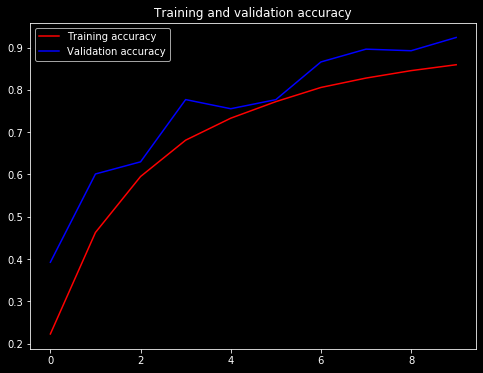

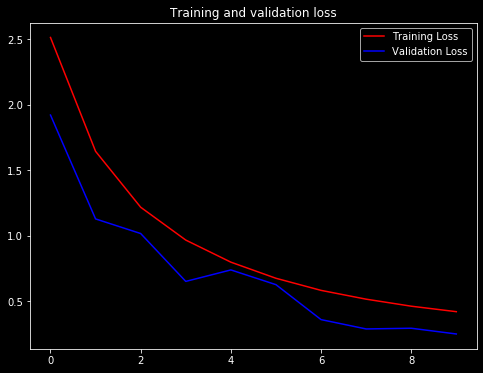

In [25]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8,6))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(8,6))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()